# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model 

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.
 
3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy. 
 
To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook. 

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(
    Path('./Resources/applicants_data.csv')
)

# Review the DataFrame
applicant_data_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns=['EIN', 'NAME'])

# Review the DataFrame
applicant_data_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [5]:
# Create a list of categorical variables 
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [6]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [7]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])


In [8]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables)
)

# Review the DataFrame
encoded_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [9]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df = pd.concat([encoded_df, applicant_data_df.drop(columns=categorical_variables)], axis=1)

# Review the Dataframe
encoded_df.head()


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,STATUS,ASK_AMT,IS_SUCCESSFUL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,108590,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6692,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,142590,1


### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [10]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df['IS_SUCCESSFUL']

# Display a sample of y
y.head()

0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

In [11]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = encoded_df.drop(columns=['IS_SUCCESSFUL'])

# Review the features DataFrame
X.head()


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,STATUS,ASK_AMT
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,108590
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6692
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,142590


### Step 6: Split the features and target sets into training and testing datasets.


In [12]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [13]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [174]:
# Define global number of epochs
epochs = 100

# Define activation function
act_function_hidden = 'relu'
act_function_out = 'sigmoid'

# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
print(f'Number of features: {number_input_features}')

# Define the number of neurons in the output layer
number_output_neurons = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  (number_input_features + number_output_neurons) // 2

# Review the number hidden nodes in the first layer
print(f'Hidden layer 1: {hidden_nodes_layer1}')

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  (hidden_nodes_layer1 + number_output_neurons) // 2

# Review the number hidden nodes in the second layer
print(f'Hidden layer 2: {hidden_nodes_layer1}')

# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=act_function_hidden))

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation=act_function_hidden))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation=act_function_out))

# Display the Sequential model summary
nn.summary()

Number of features: 116
Hidden layer 1: 58
Hidden layer 2: 58
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 58)                6786      
_________________________________________________________________
dense_114 (Dense)            (None, 29)                1711      
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 30        
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [175]:
# Compile the Sequential model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model using 50 epochs and the training data
fit_model_baseline = nn.fit(X_train_scaled, y_train, epochs=epochs)

Epoch 1/100
804/804 [==============================] - 1s 986us/step - loss: 0.5781 - accuracy: 0.7180
Epoch 2/100
804/804 [==============================] - 1s 951us/step - loss: 0.5549 - accuracy: 0.7280
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5505 - accuracy: 0.7307
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5489 - accuracy: 0.7313
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5466 - accuracy: 0.7331
Epoch 6/100
804/804 [==============================] - 1s 927us/step - loss: 0.5452 - accuracy: 0.7327
Epoch 7/100
804/804 [==============================] - 1s 943us/step - loss: 0.5443 - accuracy: 0.7344
Epoch 8/100
804/804 [==============================] - 1s 954us/step - loss: 0.5435 - accuracy: 0.7344
Epoch 9/100
804/804 [==============================] - 1s 991us/step - loss: 0.5432 - accuracy: 0.7352
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [163]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_baseline, model_accuracy_baseline = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_baseline}, Accuracy: {model_accuracy_baseline}")

268/268 - 0s - loss: 0.5663 - accuracy: 0.7313
Loss: 0.5663371682167053, Accuracy: 0.7313119769096375


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 


In [164]:
# Set the model's file path
file_path = Path("./Resources/AlphabetSoup.h5")

# Export your model to a HDF5 file
nn.save(file_path)

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 1

In [165]:
# Define activation function
act_function_hidden_A1 = 'relu'
act_function_out_A1 = 'sigmoid'

# Define the the number of inputs (features) to the model
number_input_features_A1 = len(X_train.iloc[0])

# Review the number of features
print(f'Number of features: {number_input_features_A1}')

# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 =  (number_input_features_A1 + number_output_neurons_A1) // 2

# Review the number hidden nodes in the first layer
print(f'Hidden layer 1: {hidden_nodes_layer1_A1}')

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A1 =  (hidden_nodes_layer1_A1 + number_output_neurons_A1) // 2

# Review the number hidden nodes in the second layer
print(f'Hidden layer 2: {hidden_nodes_layer2_A1}')

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer3_A1 = (hidden_nodes_layer2_A1 + number_output_neurons_A1) // 2

# Review the number hidden nodes in the second layer
print(f'Hidden layer 3: {hidden_nodes_layer3_A1}')

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer4_A1 = (hidden_nodes_layer3_A1 + number_output_neurons_A1) // 2

# Review the number of hidden nodes in the first layer
print(f'Hidden layer 4: {hidden_nodes_layer4_A1}')

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer5_A1 = (hidden_nodes_layer4_A1 + number_output_neurons_A1) // 2

# Review the number of hidden nodes in the first layer
print(f'Hidden layer 5: {hidden_nodes_layer5_A1}')

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer6_A1 = (hidden_nodes_layer5_A1 + number_output_neurons_A1) // 2

# Review the number of hidden nodes in the first layer
print(f'Hidden layer 6: {hidden_nodes_layer6_A1}')

# Create the Sequential model instance
nn_A1 = Sequential()

# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, input_dim=number_input_features_A1, activation=act_function_hidden_A1))

# Add the second hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer2_A1, activation=act_function_hidden_A1))

# Add the second hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer3_A1, activation=act_function_hidden_A1))

# Add the second hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer4_A1, activation=act_function_hidden_A1))

# Add the second hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer5_A1, activation=act_function_hidden_A1))

# Add the second hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer6_A1, activation=act_function_hidden_A1))

# Output layer
nn_A1.add(Dense(units=number_output_neurons_A1, activation=act_function_out_A1))


# Check the structure of the model
nn_A1.summary()

Number of features: 116
Hidden layer 1: 58
Hidden layer 2: 29
Hidden layer 3: 15
Hidden layer 4: 8
Hidden layer 5: 4
Hidden layer 6: 2
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 58)                6786      
_________________________________________________________________
dense_98 (Dense)             (None, 29)                1711      
_________________________________________________________________
dense_99 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_100 (Dense)            (None, 8)                 128       
_________________________________________________________________
dense_101 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_102 (Dense)            (None, 2)            

In [166]:
# Compile the Sequential model
nn_A1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model using 50 epochs and the training data
fit_model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=epochs)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6109 - accuracy: 0.7156
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5795 - accuracy: 0.7299
Epoch 3/100
804/804 [==============================] - 1s 982us/step - loss: 0.5676 - accuracy: 0.7307
Epoch 4/100
804/804 [==============================] - 1s 932us/step - loss: 0.5607 - accuracy: 0.7310
Epoch 5/100
804/804 [==============================] - 1s 942us/step - loss: 0.5567 - accuracy: 0.7339
Epoch 6/100
804/804 [==============================] - 1s 983us/step - loss: 0.5552 - accuracy: 0.7330
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7335
Epoch 8/100
804/804 [==============================] - 1s 989us/step - loss: 0.5513 - accuracy: 0.7352
Epoch 9/100
804/804 [==============================] - 1s 952us/step - loss: 0.5494 - accuracy: 0.7347
Epoch 10/100
804/804 [==============================] - 1s 962us/step - loss: 0

#### Alternative Model 2

In [167]:
# Define activation function
act_function_hidden_A2 = 'selu'
act_function_out_A2 = 'sigmoid'

# Define the the number of inputs (features) to the model
number_input_features_A2 = len(X_train.iloc[0])

# Review the number of features
print(f'Number of features: {number_input_features_A2}')

# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 =  (number_input_features_A2 + number_output_neurons_A2) // 2

# Review the number hidden nodes in the first layer
print(f'Hidden layer 1: {hidden_nodes_layer1_A2}')

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A2 =  (hidden_nodes_layer1_A2 + number_output_neurons_A2) // 2

# Review the number hidden nodes in the second layer
print(f'Hidden layer 2: {hidden_nodes_layer1_A2}')

# Create the Sequential model instance
nn_A2 = Sequential()

# Add the first hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, input_dim=number_input_features_A2, activation=act_function_hidden_A2))

# Add the second hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer2_A2, activation=act_function_hidden_A2))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A2.add(Dense(units=number_output_neurons_A2, activation=act_function_out_A2))

# Display the Sequential model summary
nn_A2.summary()

Number of features: 116
Hidden layer 1: 58
Hidden layer 2: 58
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 58)                6786      
_________________________________________________________________
dense_105 (Dense)            (None, 29)                1711      
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 30        
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


In [168]:
# Compile the Sequential model
nn_A2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model using 50 epochs and the training data
fit_model_A2 = nn_A2.fit(X_train_scaled, y_train, epochs=epochs)

Epoch 1/100
804/804 [==============================] - 1s 890us/step - loss: 0.5887 - accuracy: 0.7205
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5610 - accuracy: 0.7281
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5560 - accuracy: 0.7301
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5519 - accuracy: 0.7322
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5520 - accuracy: 0.7313
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5504 - accuracy: 0.7299
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5492 - accuracy: 0.7305
Epoch 8/100
804/804 [==============================] - 1s 944us/step - loss: 0.5481 - accuracy: 0.7315
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5470 - accuracy: 0.7330
Epoch 10/100
804/804 [==============================] - 1s 934us/step - loss: 0.5468 - 

#### Alternative Model 3

In [169]:
# Define activation function
act_function_hidden_A3 = 'gelu'
act_function_out_A3 = 'sigmoid'

# Define the the number of inputs (features) to the model
number_input_features_A3 = len(X_train.iloc[0])

# Review the number of features
print(f'Number of features: {number_input_features_A3}')

# Define the number of neurons in the output layer
number_output_neurons_A3 = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A3 =  (number_input_features_A3 + number_output_neurons_A3) // 2

# Review the number hidden nodes in the first layer
print(f'Hidden layer 1: {hidden_nodes_layer1_A3}')

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A3 =  (hidden_nodes_layer1_A3 + number_output_neurons_A3) // 2

# Review the number hidden nodes in the second layer
print(f'Hidden layer 2: {hidden_nodes_layer1_A3}')

# Create the Sequential model instance
nn_A3 = Sequential()

# Add the first hidden layer
nn_A3.add(Dense(units=hidden_nodes_layer1_A3, input_dim=number_input_features_A3, activation=act_function_hidden_A3))

# Add the second hidden layer
nn_A3.add(Dense(units=hidden_nodes_layer2_A3, activation=act_function_hidden_A3))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A3.add(Dense(units=number_output_neurons_A3, activation=act_function_out_A3))

# Display the Sequential model summary
nn_A3.summary()

Number of features: 116
Hidden layer 1: 58
Hidden layer 2: 58
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 58)                6786      
_________________________________________________________________
dense_108 (Dense)            (None, 29)                1711      
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 30        
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


In [170]:
# Compile the Sequential model
nn_A3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model using 50 epochs and the training data
fit_model_A3 = nn_A3.fit(X_train_scaled, y_train, epochs=epochs)

Epoch 1/100
804/804 [==============================] - 1s 952us/step - loss: 0.5767 - accuracy: 0.7180
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7304
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5504 - accuracy: 0.7318
Epoch 4/100
804/804 [==============================] - 1s 947us/step - loss: 0.5482 - accuracy: 0.7325
Epoch 5/100
804/804 [==============================] - 1s 958us/step - loss: 0.5460 - accuracy: 0.7338
Epoch 6/100
804/804 [==============================] - 1s 989us/step - loss: 0.5451 - accuracy: 0.7334
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5448 - accuracy: 0.7336
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5429 - accuracy: 0.7361
Epoch 9/100
804/804 [==============================] - 1s 995us/step - loss: 0.5429 - accuracy: 0.7355
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.541

#### Alternative Model 4

In [176]:
# Define activation function
act_function_hidden_A4 = 'gelu'
act_function_out_A4 = 'sigmoid'

# Define the the number of inputs (features) to the model
number_input_features_A4 = len(X_train.iloc[0])

# Review the number of features
print(f'Number of features: {number_input_features_A4}')

# Define the number of neurons in the output layer
number_output_neurons_A4 = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A4 =  (number_input_features_A4 + number_output_neurons_A4) // 2

# Review the number hidden nodes in the first layer
print(f'Hidden layer 1: {hidden_nodes_layer1_A4}')

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A4 =  (hidden_nodes_layer1_A4 + number_output_neurons_A4) // 2

# Review the number hidden nodes in the second layer
print(f'Hidden layer 2: {hidden_nodes_layer2_A4}')

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer3_A4 = (hidden_nodes_layer2_A4 + number_output_neurons_A4) // 2

# Review the number hidden nodes in the second layer
print(f'Hidden layer 3: {hidden_nodes_layer3_A4}')

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer4_A4 = (hidden_nodes_layer3_A4 + number_output_neurons_A4) // 2

# Review the number of hidden nodes in the first layer
print(f'Hidden layer 4: {hidden_nodes_layer4_A4}')

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer5_A4 = (hidden_nodes_layer4_A4 + number_output_neurons_A4) // 2

# Review the number of hidden nodes in the first layer
print(f'Hidden layer 5: {hidden_nodes_layer5_A4}')

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer6_A4 = (hidden_nodes_layer5_A4 + number_output_neurons_A4) // 2

# Review the number of hidden nodes in the first layer
print(f'Hidden layer 6: {hidden_nodes_layer6_A4}')

# Create the Sequential model instance
nn_A4 = Sequential()

# First hidden layer
nn_A4.add(Dense(units=hidden_nodes_layer1_A4, input_dim=number_input_features_A4, activation=act_function_hidden_A4))

# Add the second hidden layer
nn_A4.add(Dense(units=hidden_nodes_layer2_A4, activation=act_function_hidden_A4))

# Add the second hidden layer
nn_A4.add(Dense(units=hidden_nodes_layer3_A4, activation=act_function_hidden_A4))

# Add the second hidden layer
nn_A4.add(Dense(units=hidden_nodes_layer4_A4, activation=act_function_hidden_A4))

# Add the second hidden layer
nn_A4.add(Dense(units=hidden_nodes_layer5_A4, activation=act_function_hidden_A4))

# Add the second hidden layer
nn_A4.add(Dense(units=hidden_nodes_layer6_A4, activation=act_function_hidden_A4))

# Output layer
nn_A4.add(Dense(units=number_output_neurons_A4, activation=act_function_out_A4))


# Check the structure of the model
nn_A4.summary()

Number of features: 116
Hidden layer 1: 58
Hidden layer 2: 29
Hidden layer 3: 15
Hidden layer 4: 8
Hidden layer 5: 4
Hidden layer 6: 2
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 58)                6786      
_________________________________________________________________
dense_117 (Dense)            (None, 29)                1711      
_________________________________________________________________
dense_118 (Dense)            (None, 15)                450       
_________________________________________________________________
dense_119 (Dense)            (None, 8)                 128       
_________________________________________________________________
dense_120 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_121 (Dense)            (None, 2)            

In [177]:
# Compile the Sequential model
nn_A4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model using 50 epochs and the training data
fit_model_A4 = nn_A4.fit(X_train_scaled, y_train, epochs=epochs)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5771 - accuracy: 0.7113
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5515 - accuracy: 0.7319
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5483 - accuracy: 0.7334
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5462 - accuracy: 0.7350
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5442 - accuracy: 0.7349
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5432 - accuracy: 0.7347
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5424 - accuracy: 0.7366
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5410 - accuracy: 0.7364
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5411 - accuracy: 0.7362
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5400 - accura

### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

<AxesSubplot:>

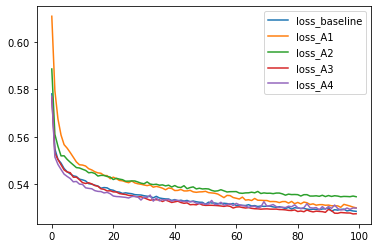

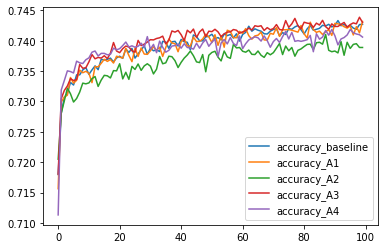

In [178]:
# Create a DataFrame using the model history for loss
models_plot_loss = pd.DataFrame(
    {'loss_baseline' : fit_model_baseline.history['loss'],
    'loss_A1' : fit_model_A1.history['loss'],
    'loss_A2' : fit_model_A2.history['loss'],
    'loss_A3' : fit_model_A3.history['loss'],
    'loss_A4' : fit_model_A4.history['loss']
    }
)

# Vizualize the model plot where the y-axis displays the loss metric
models_plot_loss.plot()

# Create a DataFrame using the model history for accuracy
models_plot_accuracy = pd.DataFrame(
    {'accuracy_baseline' : fit_model_baseline.history['accuracy'],
    'accuracy_A1' : fit_model_A1.history['accuracy'],
    'accuracy_A2' : fit_model_A2.history['accuracy'],
    'accuracy_A3' : fit_model_A3.history['accuracy'],
    'accuracy_A4' : fit_model_A4.history['accuracy']
    }
)

# Vizualize the model plot where the y-axis displays the accuracy metric
models_plot_accuracy.plot()

In [185]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_baseline, model_accuracy_baseline = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_baseline}, Accuracy: {model_accuracy_baseline}")

Original Model Results
268/268 - 0s - loss: 0.5611 - accuracy: 0.7307
Loss: 0.561127245426178, Accuracy: 0.7307288646697998


In [184]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A1, model_accuracy_A1 = nn_A1.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_A1}, Accuracy: {model_accuracy_A1}")

Alternative Model 1 Results
268/268 - 0s - loss: 0.5581 - accuracy: 0.7294
Loss: 0.5580662488937378, Accuracy: 0.7294460535049438


In [186]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A2, model_accuracy_A2 = nn_A2.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_A2}, Accuracy: {model_accuracy_A2}")

Alternative Model 2 Results
268/268 - 0s - loss: 0.5651 - accuracy: 0.7255
Loss: 0.5651211738586426, Accuracy: 0.7254810333251953


In [188]:
print("Alternative Model 3 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A3, model_accuracy_A3 = nn_A3.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_A3}, Accuracy: {model_accuracy_A3}")

Alternative Model 3 Results
268/268 - 0s - loss: 0.5734 - accuracy: 0.7314
Loss: 0.5733740925788879, Accuracy: 0.7314285635948181


In [187]:
print("Alternative Model 4 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A4, model_accuracy_A4 = nn_A4.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_A4}, Accuracy: {model_accuracy_A4}")

Alternative Model 4 Results
268/268 - 0s - loss: 0.5711 - accuracy: 0.7305
Loss: 0.5711314678192139, Accuracy: 0.7304956316947937


### Step 3: Save each of your alternative models as an HDF5 file.


In [179]:
# Set the file path for the first alternative model
file_path = Path("./Resources/AlphabetSoup_A1.h5")

# Export your model to a HDF5 file
nn_A1.save(file_path)

In [180]:
# Set the file path for the first alternative model
file_path = Path("./Resources/AlphabetSoup_A2.h5")

# Export your model to a HDF5 file
nn_A2.save(file_path)

In [181]:
# Set the file path for the first alternative model
file_path = Path("./Resources/AlphabetSoup_A3.h5")

# Export your model to a HDF5 file
nn_A3.save(file_path)

In [182]:
# Set the file path for the first alternative model
file_path = Path("./Resources/AlphabetSoup_A4.h5")

# Export your model to a HDF5 file
nn_A4.save(file_path)